In [ ]:
!pip install seaborn

## Pourquoi seaborn ? 
   * 1. Compatible avec pandas, numpy et matplotlib
   * 2. Contient des datasets prêtes
   * 3. Des graphes avancés (tel que le KDE et 'plot avec hue', etc.) n'existent pas dans matplotlib, alors qu'ils sont facilement crées avec seaborn
   * 4. Visuellement mieux que matplotlib

In [2]:
import seaborn as sns

In [3]:
iris = sns.load_dataset('iris') 
iris

URLError: <urlopen error [Errno 11001] getaddrinfo failed>

Lien de la bibliothèque pour plus de détail:
  
  * https://seaborn.pydata.org/examples/index.html

## 1. line plot

**utilisation :**
* pour visualiser la variation et tendance d'une valeur en fonction d'une autre

**axes :**
* x : valeurs quantitatives (comme le temps, etc.)
* y : valeurs quantitatives (température, prix, vitesse, etc.)


In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a sample DataFrame
data = {'Date': ['01-01-2023', '01-02-2023', '01-03-2023', '01-04-2023', '01-05-2023'],
        'Value': [10, 15, 13, 18, 12]}
df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])

df

,Date,Value
0,2023-01-01,10
1,2023-01-02,15
2,2023-01-03,13
3,2023-01-04,18
4,2023-01-05,12


<Axes: xlabel='Date', ylabel='Value'>

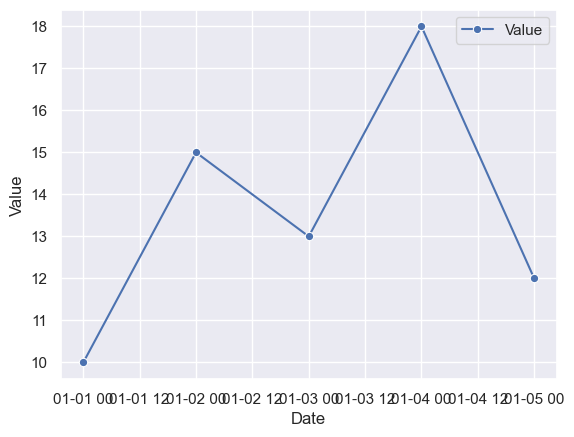

In [20]:
## vous pouvez le faire directement 
sns.lineplot(x='Date', y='Value', data=df, marker='o', color='b', label='Value')

In [ ]:
## mais, pour bien personaliser la figure (axe des x etc.), voir cellule suivante:

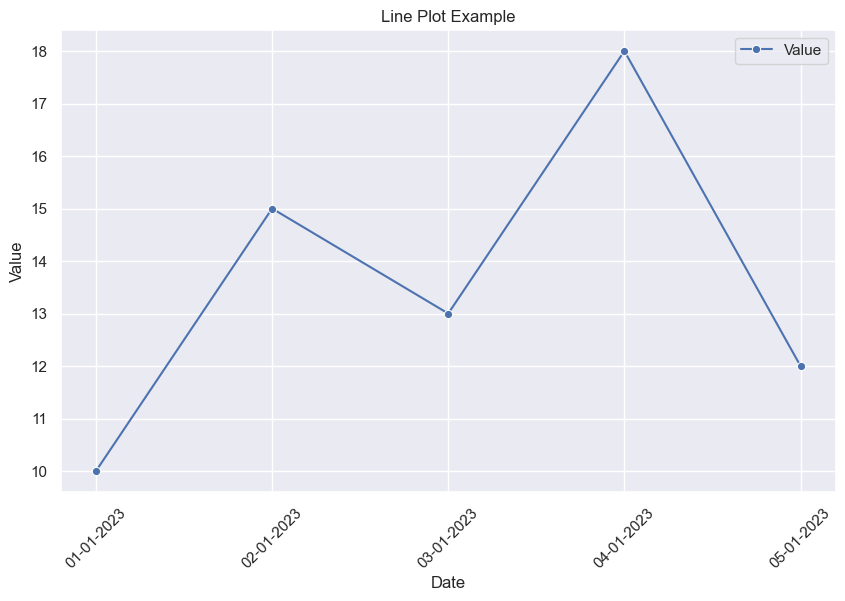

In [21]:
# definir un style (optionnel)
sns.set()  #ou bien:
# sns.set(style="whitegrid")

# Créer un line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Value', data=df, marker='o', color='b', label='Value')

# rajouter les labels
plt.xlabel('Date')
plt.ylabel('Value')

# set date dormat
import matplotlib.dates as mdates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.xticks(df['Date'], rotation=45)

plt.title('Line Plot Example')

# afficher la legend
plt.legend()

# Show the plot
plt.show()

## 2. Scatter plot

**utilisation :**
* pour visualiser :
    * s'il y a des clusters (des groupements séparés)
    * et aussi, s'il y a une corrélation (positive ou négative) 

**axes :**
* x : valeurs quantitatives (comme le  poids, etc.)
* y : valeurs quantitatives (prix, probabilité d'être malade, etc.)

In [4]:
import seaborn as sns
from matplotlib import pyplot as plt

In [5]:
diamonds = sns.load_dataset('diamonds')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [26]:
len(diamonds)

53940

In [25]:
type(diamonds)   #pandas dataframe depuis seaborn dataset

pandas.core.frame.DataFrame

In [30]:
## parceque c'est une pandas df, on peut donc appliquer toutes les opérations qu'on a vu de pandas
diamonds = diamonds[
            diamonds.cut.isin(['Premium', 'Good']) &    #laisse que deux catégories de cut ('Premium' et 'Good')
            diamonds.color.isin(['D', 'F', 'J'])        #laisse que trois catégories de color ('D', 'F', 'J')
            ].sample(n=100, random_state=22) 

diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
10801,1.06,Premium,F,SI1,62.4,58.0,4862,6.56,6.51,4.07
3457,0.88,Premium,D,SI2,60.9,61.0,3390,6.16,6.13,3.74
21628,1.26,Premium,D,VS2,62.5,59.0,9720,6.91,6.85,4.30
3918,1.02,Premium,J,SI1,61.2,57.0,3496,6.58,6.43,3.98
46240,0.53,Premium,F,VS2,61.9,58.0,1753,5.20,5.17,3.21


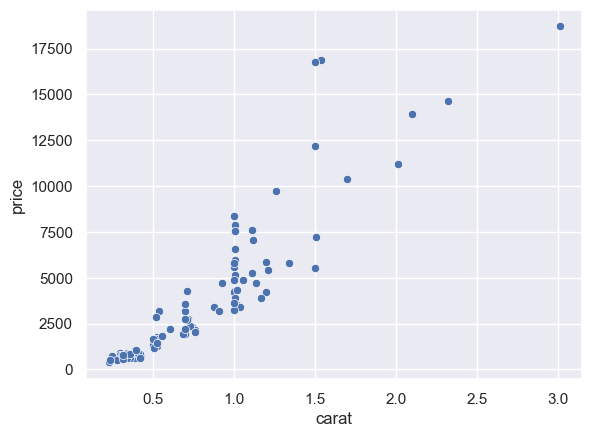

In [31]:
sns.scatterplot(x='carat', y='price', data=diamonds);

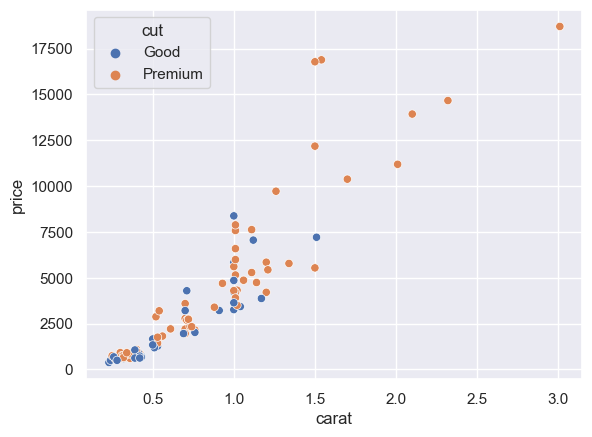

In [17]:
## selon la variable catégorique
sns.scatterplot(x='carat', y='price', hue='cut',       # hue pour rajouter un filtre selon une variable catégorique
                data=diamonds, 
                hue_order=['Good', 'Premium']           
               );

## 3. Boxplot 

**utilisation :**

   Le boxplot offre un résumé des principales statistiques d'une distribution (autour de la médiane):
   
   - **La médiane** (ligne à l'intérieur de la boîte) : C'est la valeur centrale des données.
   - **Le premier quartile (Q1)** et **le troisième quartile (Q3)** : Ils représentent les limites de la boîte. 50 % des données se trouvent entre ces deux valeurs.
   - **L’étendue interquartile (IQR)** : C'est la différence entre le troisième et le premier quartile (Q3 - Q1), qui indique la dispersion des données autour de la médiane.
   - **Les valeurs minimales et maximales** (limites des "whiskers") : Elles indiquent l'étendue des données, en excluant les valeurs aberrantes.
   - **valeurs aberrantes** : Le boxplot permet de détecter facilement les **valeurs aberrantes** ou extrêmes. Les points situés en dehors des "whiskers" (les lignes qui s'étendent de la boîte) sont généralement considérés comme des outliers.

---
   
   - Si la médiane est proche du centre de la boîte, la distribution est probablement **symétrique**.
   - Si la médiane est plus proche du premier ou du troisième quartile, cela peut indiquer que la distribution est **asymétrique**.



**axes :** 

un seul axe (soit x ou y, arbitraire), avec des valeurs quantitatives

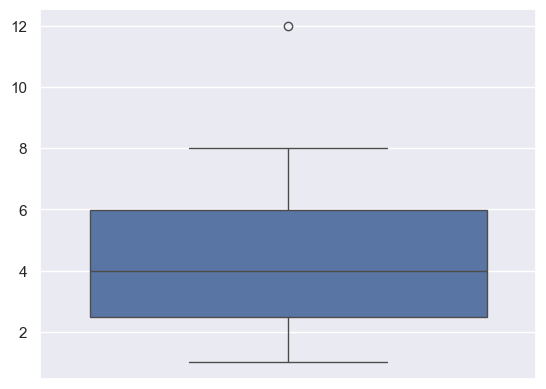

In [38]:
import seaborn as sns

data = [1, 1.4, 2.3, 3, 3.8,   4.2, 5, 6.3, 8, 12]
sns.boxplot(data);


## 1. Méthode de Hinge: L'Algorithme de base:

0. données = [1, 1.4, 2.3, 3, 3.8, 4.2, 5, 6.3, 8, 12]     
1. projetez vos valeurs / données sur l'axe des x (afin qu'elles soient en ordre ascendant)
2. trouvez la médiane
3. tracez trois lignes verticales :
    - **q1**: une depuis les 25 % des données, c'est-à-dire le 25e centile,
    - **q2**: la deuxième au niveau des 50 %, c'est-à-dire la médiane,
    - **q3**: une troisième au niveau des 75 %, c'est-à-dire le 75e centile.
4. Reliez les lignes --> c'est la partie box
5. Maintenant, les whiskers (en français : moustaches),
    - calculez la portée interquartile (IQR) = la distance de la boîte, c'est-à-dire du 25e au 75e centile
    - Maintenant, étirez les moustaches jusqu'au dernier point de données qui se trouve dans 1,5*IQR
    - s'il y avait un point en dehors de 1,5*IQR --> le point est appelé un "écart-type"

In [3]:
from matplotlib import pyplot as plt
import seaborn as sns

cars = sns.load_dataset('mpg').dropna()
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


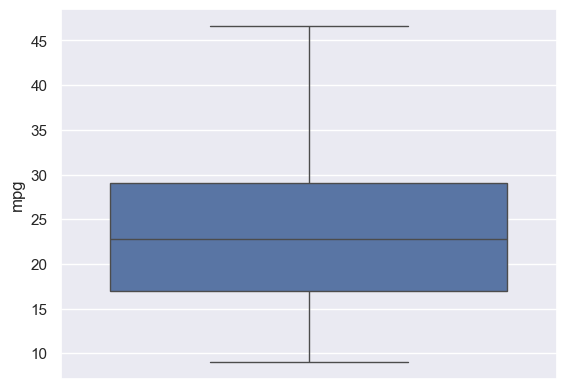

In [37]:
sns.boxplot(cars.mpg);

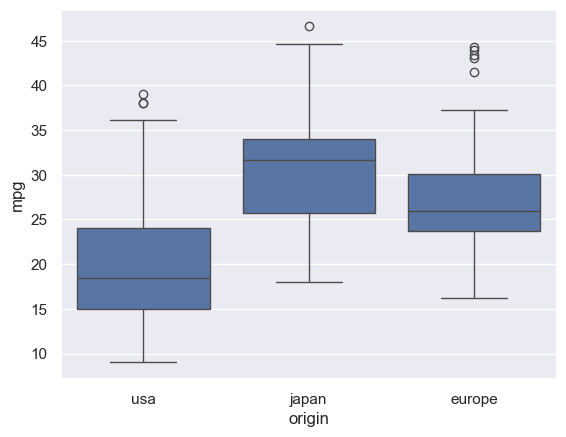

In [34]:
sns.boxplot(x=cars.origin, y=cars.mpg);

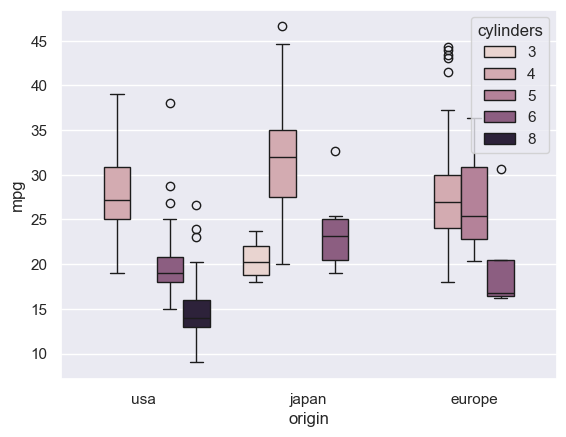

In [35]:
sns.boxplot(x='origin', y='mpg', hue='cylinders', data=cars);

## 4. Histogram

* Distribution d'une variable catégorielle par rapport à une variable numérique, par exemple : Distribution des pixels et de l'intensité.


**utilisation :**
* identifier la valeur (ou les valeurs) la plus dominante
  
**axes :**
* x : valeur catégorique (exemple: les pays) ou même quantitative (surtout discontinue) (exemple: le nombre des membres de famille)
* y : valeurs quantitatives (généralement, la fréquence de répitition)

In [36]:
import seaborn as sns
penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [37]:
penguins.shape

(344, 7)

In [38]:
penguins.dropna(inplace=True)
penguins.shape

(333, 7)

In [2]:
sns.histplot(penguins.bill_length_mm);
# sns.despine()
# plt.xlabel('')
# plt.tight_layout();

NameError: name 'sns' is not defined

### Ici, on veux voir la distribution des intensité de couleur (niveau de gris) :
* c.à.d , combien de pixel prend chaque intensité

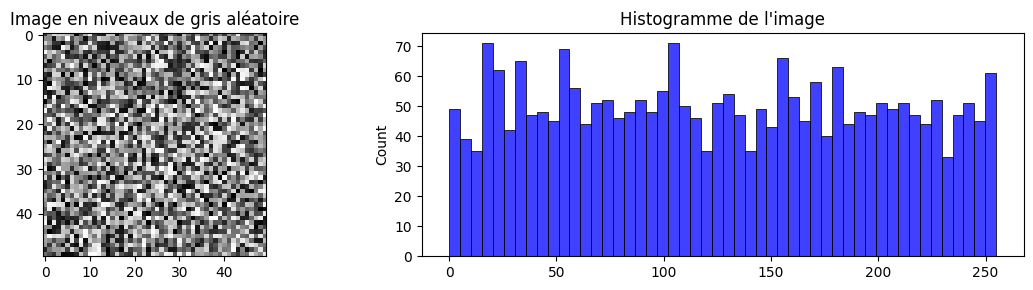

In [6]:
## import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# X = np.random.randn(50, 50)  #ou
X = np.random.randint(0, 256, size=(50, 50))

# Afficher l'image
plt.figure(figsize=(12, 3))
        #Ligne, Col, idx
plt.subplot(1, 2, 1)
plt.imshow(X, cmap='gray')
plt.title('Image en niveaux de gris aléatoire')

# Afficher l'histogramme de l'image
plt.subplot(1, 2, 2)  
sns.histplot(X.ravel(), color='blue', bins=50)

plt.title('Histogramme de l\'image')

plt.tight_layout()
plt.show()

In [3]:
## pour une vrai image 

import cv2
import seaborn as sns
import matplotlib.pyplot as plt

image_path = 'H2.jfif'  
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

type(image)

numpy.ndarray

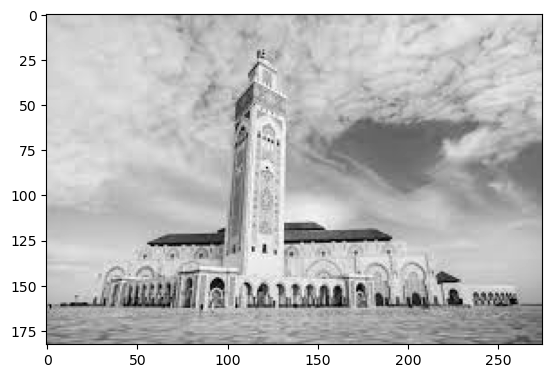

In [4]:
plt.imshow(image, cmap='gray')

In [3]:
# %matplotlib notebook

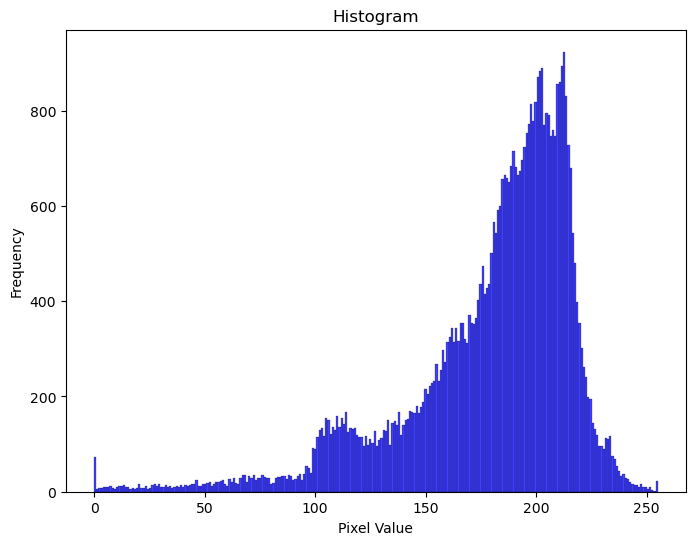

In [5]:
pixel_values = image.flatten()

plt.figure(figsize=(8, 6))
sns.histplot(pixel_values, color='blue', bins=256)  

plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Histogram')

plt.show()

In [6]:
from matplotlib import pyplot as plt
import seaborn as sns

penguins = sns.load_dataset('penguins').dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


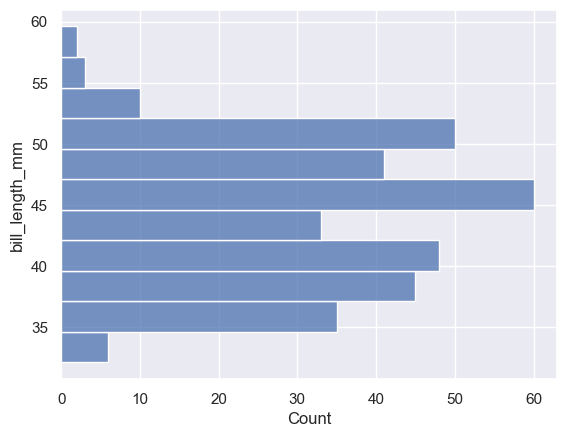

In [46]:
# horizontal
sns.histplot(y = 'bill_length_mm', data=penguins);

**density** - AREA of histogram sums to one

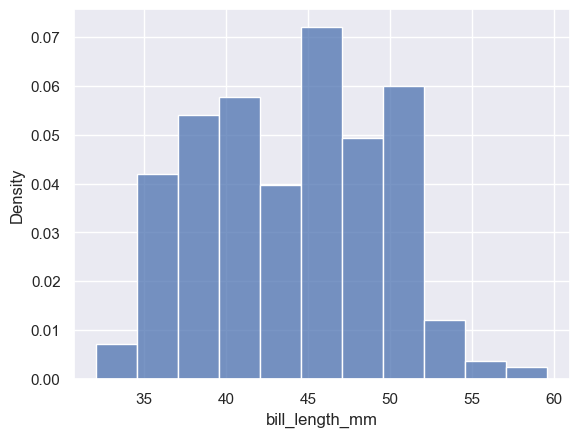

In [50]:
# percentage
sns.histplot(x='bill_length_mm', data=penguins,
             stat='density'
            );

**probability** - HEIGHT of histogram bars to one

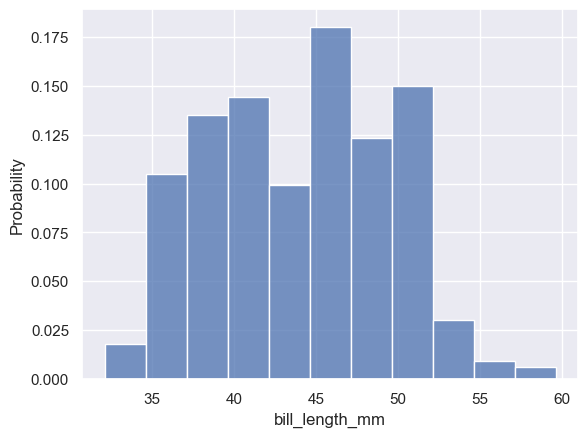

In [52]:
sns.histplot(x='bill_length_mm', data=penguins,
             stat='probability'
            );

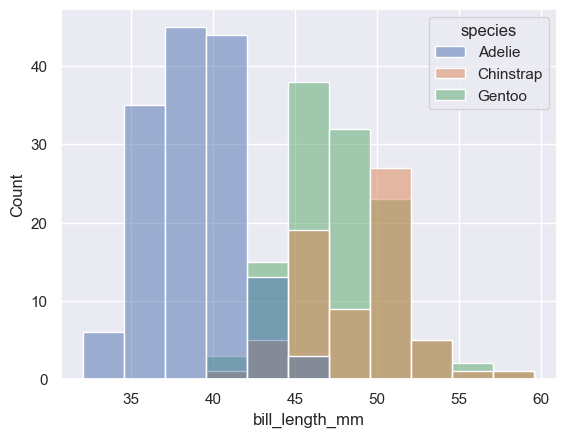

In [53]:
sns.histplot(x='bill_length_mm', data=penguins, hue='species');

## 5. KDE plot
**kernel density estimation**

**C'est la version continue de l'Histogramme**

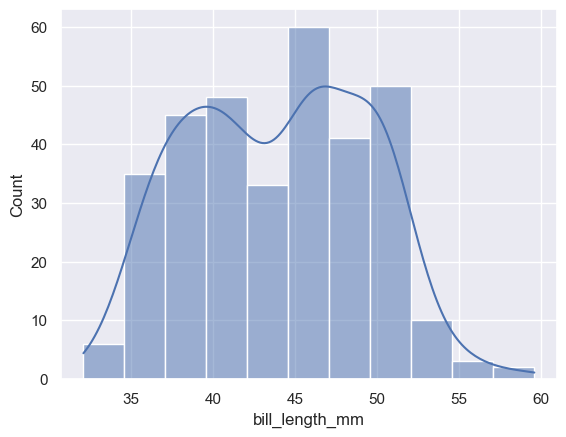

In [48]:
sns.histplot(x='bill_length_mm', data=penguins,
             kde=True
             );

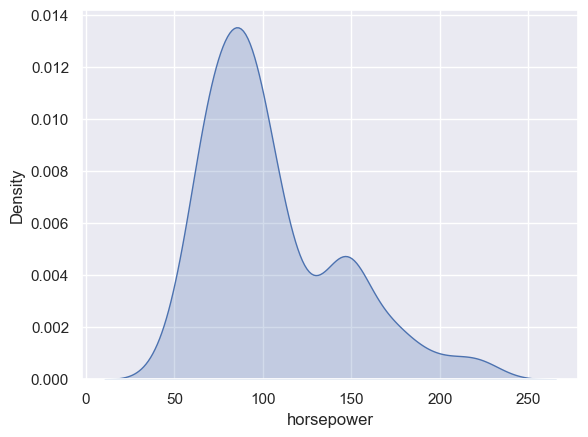

In [56]:
# univariate
sns.kdeplot(cars.horsepower, fill=True);

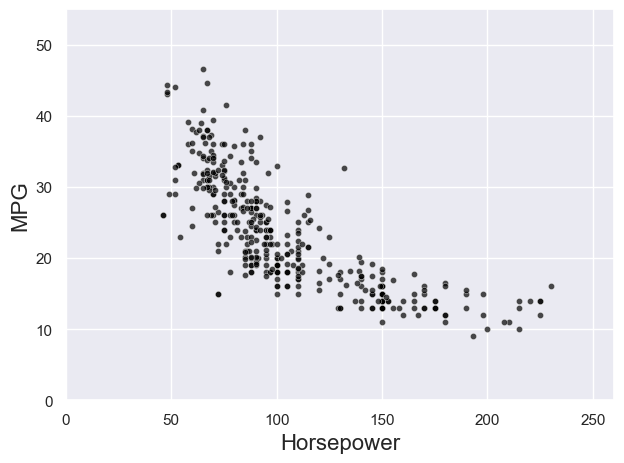

In [58]:
## bivariate
#sns.kdeplot(cars.horsepower, cars.mpg)
sns.scatterplot(x='horsepower', y='mpg', data=cars, color='black', alpha=0.7, s=20)
plt.xlim(0, 260)
plt.ylim(0, 55)
plt.xlabel('Horsepower', fontsize=16)
plt.ylabel('MPG', fontsize=16)
plt.tight_layout();

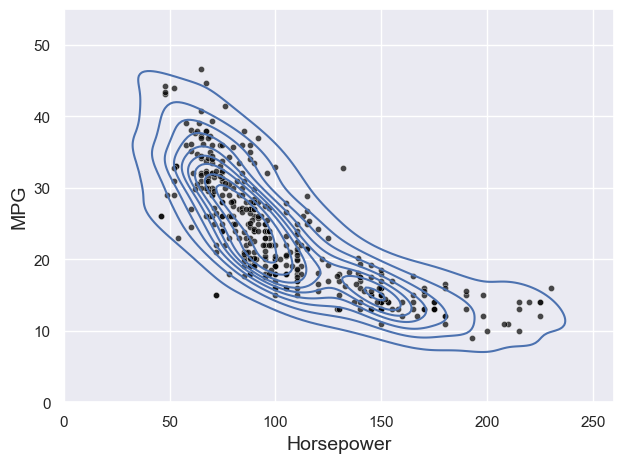

In [62]:
sns.kdeplot(x='horsepower', y='mpg', data=cars)
sns.scatterplot(x='horsepower', y='mpg', data=cars, color='black', alpha=0.7, s=20)
plt.xlim(0, 260)
plt.ylim(0, 55)
plt.xlabel('Horsepower', fontsize=14)
plt.ylabel('MPG', fontsize=14)
plt.tight_layout();

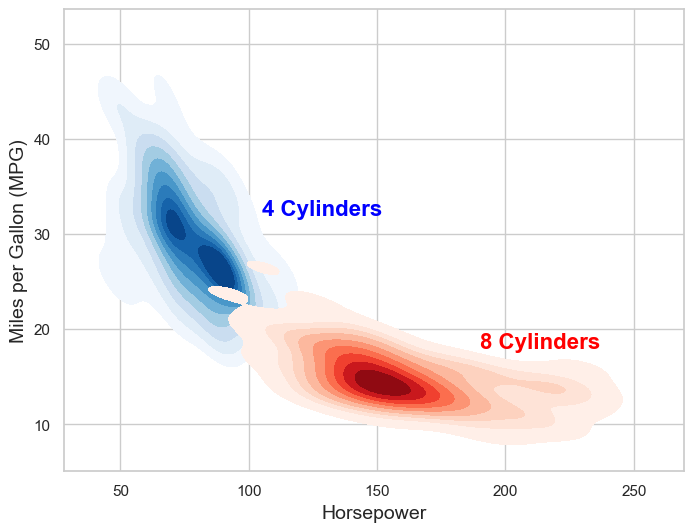

In [68]:
sns.set_style('whitegrid')

cyl_4 = cars[cars.cylinders==4]
cyl_8 = cars[cars.cylinders==8]

plt.figure(figsize=(8,6))

sns.kdeplot(x='horsepower', y='mpg', data=cyl_4,
            cmap="Blues", fill=True) 

sns.kdeplot(x='horsepower', y='mpg', data=cyl_8,
            cmap="Reds", fill=True) 

plt.xlabel('Horsepower', fontsize=14)
plt.ylabel('Miles per Gallon (MPG)', fontsize=14)

plt.annotate("4 Cylinders", (105, 32), color='blue', fontsize=16, fontweight='bold')
plt.annotate("8 Cylinders", (190, 18), color='red', fontsize=16, fontweight='bold');

## 6. Violin plot

**Boxplot + KDE plot**

In [1]:
from matplotlib import pyplot as plt
import seaborn as sns

cars = sns.load_dataset('mpg').dropna()

cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [2]:
cars.cylinders.value_counts()

cylinders
4    199
8    103
6     83
3      4
5      3
Name: count, dtype: int64

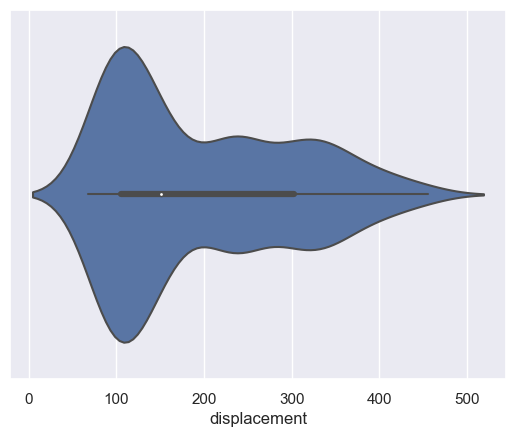

In [8]:
cars = cars[cars.cylinders.isin([4,6,8])]
sns.violinplot(x = cars.displacement);

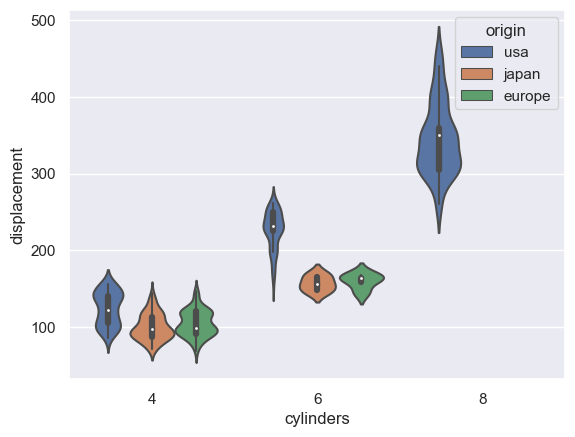

In [7]:
sns.violinplot(x='cylinders', y='displacement', hue='origin',
               data=cars
              );

## 7. Bar plot

* Contrairement à l'histogramme, un diagramme en barres est utilisé pour visualiser de nombreuses variables catégoriques par rapport à une variable numérique, par exemple : l'âge des hommes et des femmes.

    * distributions des notes des étudiants dans un exam -----> histogramme
    * comparer les notes par genre (filles et garçons) -----> bar plot 

In [69]:
import seaborn as sns

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


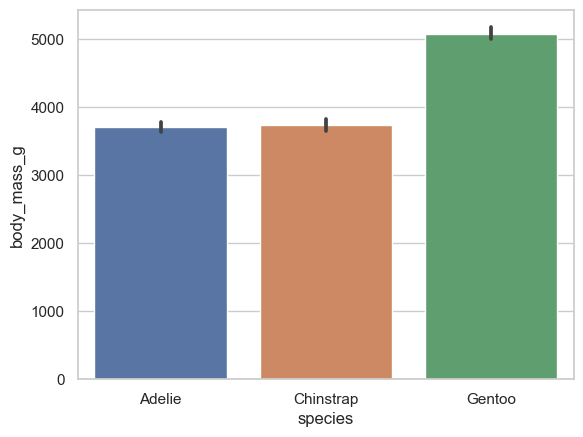

In [70]:
sns.barplot(x='species', y='body_mass_g', data=penguins);

In [71]:
penguins.groupby('species').body_mass_g.mean()

species
Adelie       3700.662252
Chinstrap    3733.088235
Gentoo       5076.016260
Name: body_mass_g, dtype: float64

<Axes: xlabel='species', ylabel='count'>

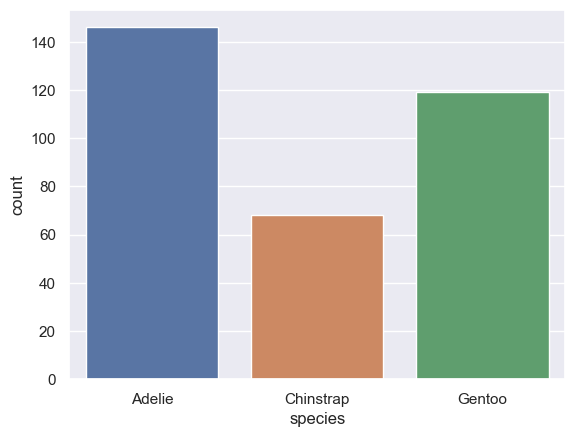

In [45]:
## Voir aussi: le countplot (une variation du barplot, où l'axe des y est toujours le comptage)

sns.countplot(x='species', data=penguins, hue='species')

## 8. Heatmap

In [6]:
import seaborn as sns

from matplotlib import pyplot as plt
import numpy as np
cars = sns.load_dataset('mpg')
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [8]:
cars_num = cars.select_dtypes(include=['number'])

In [10]:
cars_num.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


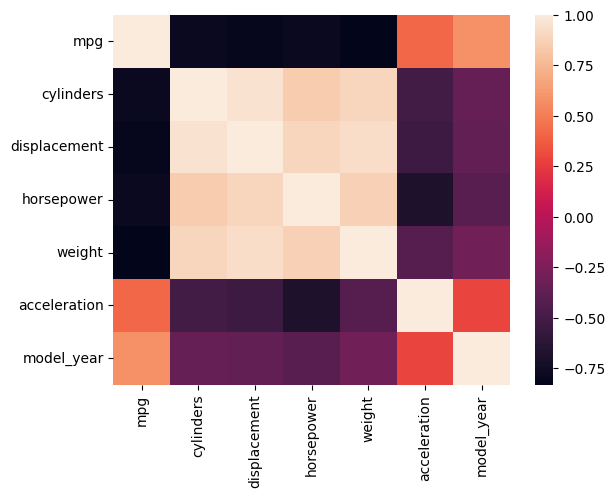

In [12]:
sns.heatmap(cars_num.corr());

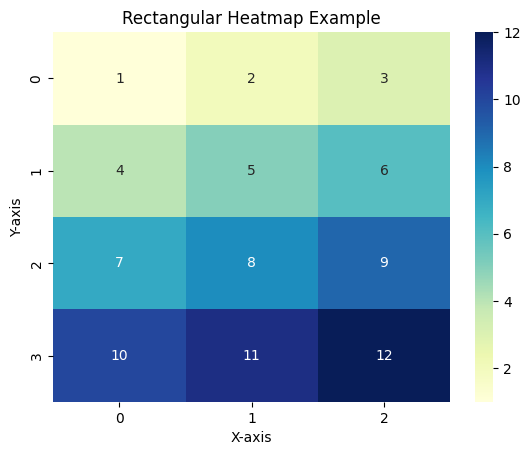

In [1]:
# la matrice ne doit pas forcément être une matrice carrée


import seaborn as sns
import matplotlib.pyplot as plt

data = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
    [10, 11, 12]
]

sns.heatmap(data, annot=True, cmap='YlGnBu', cbar=True)

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Rectangular Heatmap Example')
plt.show()


## 9. Pie chart

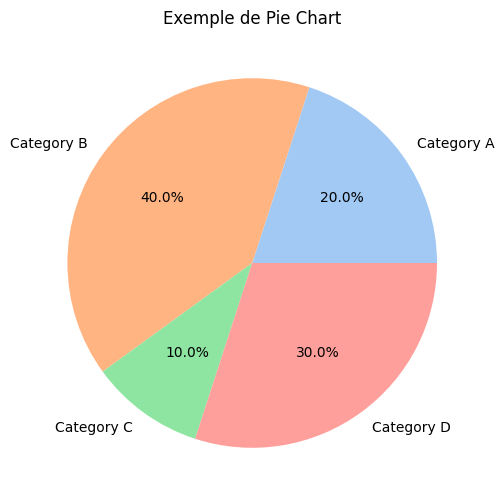

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

labels = ['Category A', 'Category B', 'Category C', 'Category D']
sizes = [20, 40, 10, 30]  # la somme doit être 100 (ces des poucentages)

palette_couleurs = sns.color_palette('pastel') #'bright', etc.

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=palette_couleurs, autopct='%1.1f%%') 
plt.title('Exemple de Pie Chart')
plt.show()


## Exemples d'utilisations:

1. **Graphique Linéaire :**
   - Affichage des tendances et des changements au fil du temps (par exemple, les prix des actions, les variations de température).
   - Affichage de données continues telles qu'une série temporelle.

2. **Diagramme de Dispersion (Nuage de Points) :**
   - Étude des relations entre deux variables continues (par exemple, taille vs. poids).
   - Identification des corrélations ou des regroupements au sein des points de données.

3. **Boîte à Moustaches (Diagramme en Boîte) :**
   - Visualisation de la distribution d'un ensemble de données et identification des valeurs aberrantes.
   - Comparaison de la distribution de plusieurs ensembles de données (par exemple, la comparaison des notes d'examens dans différentes classes).

4. **Histogramme :**
   - Visualisation de la distribution d'une variable unique (par exemple, la répartition par âge, les notes d'examens).
   - Identification de modèles tels que la distribution normale, l'asymétrie ou les valeurs aberrantes.

5. **Estimation de la Densité par Noyaux (KDE) :**
   - Distributions Bimodales ou Multimodales : Le KDE peut aider à identifier et à visualiser plusieurs modes ou pics dans les données, qui peuvent ne pas être apparents dans un histogramme ou d'autres types de graphiques.
   - Comparaison de Distributions : Vous pouvez utiliser le KDE pour comparer les distributions de différents ensembles de données. Par exemple, vous pourriez vouloir comparer la répartition par âge de deux populations différentes.

6. **Diagramme en Violon :**
   - Combinaison des caractéristiques d'un diagramme en boîte et d'un graphique de densité par noyaux pour montrer la distribution des données.
   - Comparaison de la distribution d'une variable entre différentes catégories.

7. **Diagramme à Barres :**
   - Comparaison de catégories ou de groupes (par exemple, ventes par produit, notes des étudiants par matière).
   - Affichage de la distribution des données au sein de catégories discrètes.

8. **Carte de Chaleur (Heatmap) :**
   - Affichage de la matrice de corrélation des variables.
   - Visualisation de la concentration des points de données dans un espace 2D (par exemple, l'activité des utilisateurs sur un site web au fil du temps).

9. **Diagramme Circulaire (Camembert) :**
   - Affichage des parties d'un ensemble entier (par exemple, la part de marché de différents produits dans une catégorie).
   - Affichage de la composition d'un ensemble de données en pourcentages.